# Prosper Loan Data
## by Andrei Tibuliac

## Preliminary Wrangling

> This project is about a data set that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

Load into a pandas dataframe and print statistics

In [2]:
#loading the data
prosper_loan = pd.read_csv('prosperLoanData.csv')
# Sample of the table
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#High level overview of data shape and composition
print(prosper_loan.shape)
print(prosper_loan.dtypes)
print(prosper_loan.head(4))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN  

In [4]:
#See number of duplicated data entries
sum(prosper_loan.duplicated())

0

As we can see ,fortunately we don't have any duplicated data entry

In [5]:
# The numbers of null values in every columns
prosper_loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [6]:
# Remove loans with missing borrowerAPR and BorrowerRate information
prosper_loan = prosper_loan[~prosper_loan.BorrowerAPR.isna()]
prosper_loan = prosper_loan[~prosper_loan.BorrowerRate.isna()]

In [7]:
#The number of columns and rows after the removing
prosper_loan.shape

(113912, 81)

In [8]:
# Column types
list(prosper_loan.columns.values)
print(prosper_loan.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


Numberical and Categorical features

In [9]:
numeric_values = ['ProsperScore', 'CurrentCreditLines', 'OpenRevolvingAccounts','AvailableBankcardCredit',
               'LoanMonthsSinceOrigination','MonthlyLoanPayment']
categoric_values = ['LoanStatus','IsBorrowerHomeowner', 'IncomeVerifiable', 'ListingCategory','EmploymentStatus']

In [10]:
#Creating a new column of the year creation of borrowers from the date
prosper_loan['year'] = prosper_loan['ListingCreationDate'].astype(str).str[:4]

In [11]:
#Remove columns and columns that are not really useful in the Dateset
prosper_loan.drop(['ListingKey', 'ListingNumber','DateCreditPulled','ListingCreationDate','ClosedDate',
                   'FirstRecordedCreditLine','LoanKey','LoanOriginationDate','MemberKey'], axis=1, inplace = True)

In [12]:
#Sample of the table
prosper_loan.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,year
0,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007
1,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
2,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007
3,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013


### What is the structure of your dataset?
The final structure after cleaning,of the dataset is of with 113912 informations about the loans , with 72 features (examples:'CreditGrade','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn',). Most variables are numeric in nature, but there are some that are categorical, like 'LoanStatus','IsBorrowerHomeowner', 'IncomeVerifiable', etc.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the columns that give us the most information ,which we can analyze, about the dataset with columns such as: BorrowerAPR, BorrowerRate , LoanOriginalAmount , StatedMonthlyIncome , ProsperScore , EmploymentStatus  etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

After gathering, collecting , assessing and cleaning the data we will go on and do an univariate, bivariate and multivariate exploration of the data. I think the The Borrower's Annual Percentage Rate (APR) for the loan and The Borrower's ProsperScore and LoanOriginalAmount rate for loans data will be the most significant variables which we can start with. 

## Univariate Exploration

Distribution of the main variable of interest: BorrowerRate.

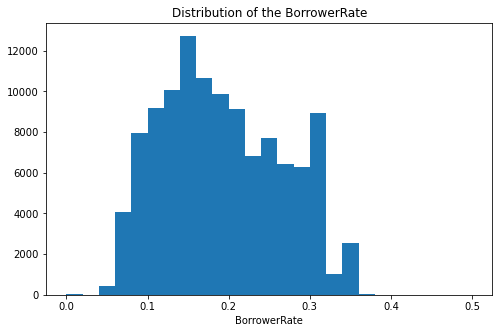

In [13]:
# plots the bar graph
color = sb.color_palette()[0]
# start with a standard-scaled plot
bins = np.arange(0, prosper_loan.BorrowerRate.max()+0.02, 0.02)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'BorrowerRate', bins = bins);
plt.title('Distribution of the BorrowerRate');
plt.xlabel('BorrowerRate');

Distribution of the main variable of interest: BorrowerAPR.

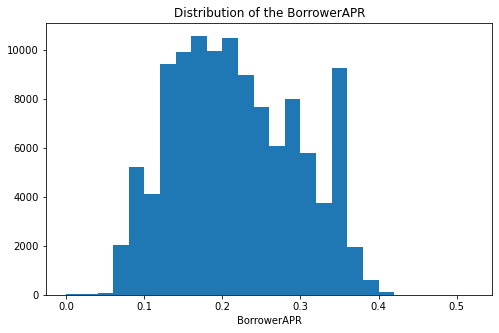

In [14]:
# plots the bar graph
color = sb.color_palette()[0]
# start with a standard-scaled plot
bins = np.arange(0, prosper_loan.BorrowerAPR.max()+0.02, 0.02)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'BorrowerAPR', bins = bins);
plt.title('Distribution of the BorrowerAPR');
plt.xlabel('BorrowerAPR');

The distribution of those rates looks slightly similar and multimodal. In both cases  there is a large peak centered at 0.2 and a very shape peak between 0.35 and 0.36. Only very few loans have a Borrower Rate greater than 0.35 and an APR greater than 0.43.

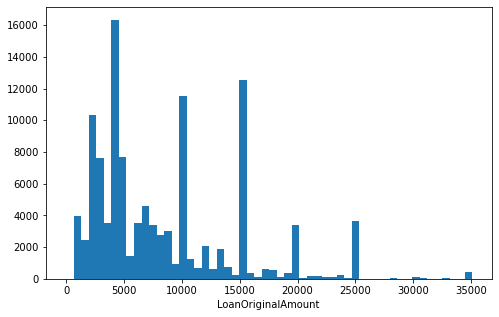

In [15]:
# Distribution of original loan amount
binsize = 650
bins = np.arange(0, prosper_loan['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ')
plt.show()

We can see that the distribution of the original loan amount is slightly right screwed, with most frequent amout loaned of 5000, 10000 and 15000.

Look at the distributions of other variables of interest: stated monthly income

Text(0.5, 0, 'StatedMonthlyIncome ')

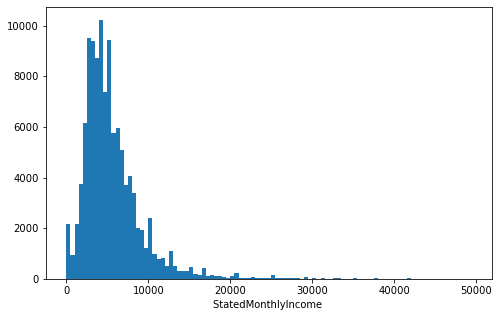

In [16]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.xlabel('StatedMonthlyIncome ')

We can see that the distribution of stated monthly income is very right screwed, with most of stated monthly income less than 30k.

ProsperScore is the custom risk score built using historical Prosper  data. The score ranges from 1-10, with 10 being the best, or lowest risk  score.

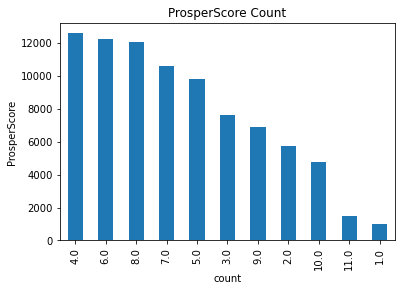

In [17]:
# see which ProsperScore borrowers received the most
prosper_loan['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore')
plt.fontsize = 12
plt.figsize=(12,12)

The highest ProsperScore count is of 4 value

Top employment status of Prosper company loaners.

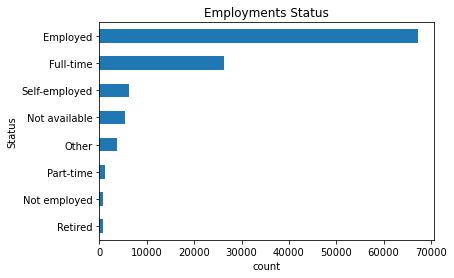

In [18]:
# Find out the employment status of the clients 
prosper_loan['EmploymentStatus'].value_counts()[9::-1].plot(kind='barh')
plt.title('Employments Status')
plt.xlabel('count')
plt.ylabel('Status')
plt.fontsize = 12
plt.figsize=(11,9)

We can see that most of the borrowers are employed and working full time.

Top employment professions of Prosper company loaners.

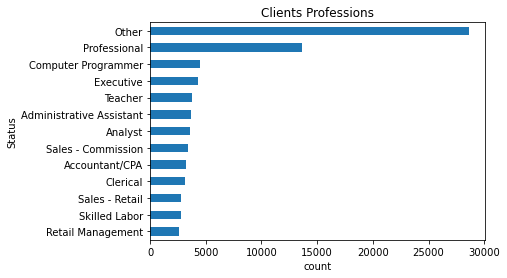

In [19]:
#Reveall the top employment professions of the clients 
prosper_loan['Occupation'].value_counts()[12::-1].plot(kind='barh')
plt.title('Clients Professions')
plt.xlabel('count')
plt.ylabel('Status')
plt.fontsize = 13
plt.figsize=(11,9)

We can see that most of the clients where reluctant to offer their real occupation status so the first two professions  are of 'others' and 'professions' category which it doesn't necessarily help us to much to determined their real jobs. 

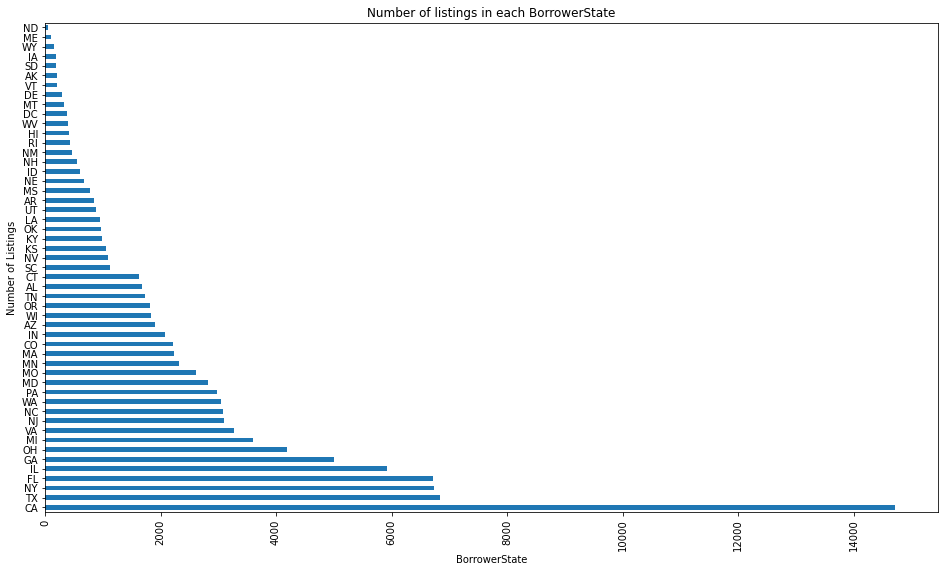

In [20]:
#Number of listings in each BorrowerState
states_count = prosper_loan.BorrowerState.value_counts()

# plots the bar graph
color = sb.color_palette()[0]

plt.figure(figsize=(16,9))
states_count.plot(kind='barh', color=color);

plt.title('Number of listings in each BorrowerState');
plt.xlabel('BorrowerState');
plt.ylabel('Number of Listings');
plt.xticks(rotation=90);

As an insight the data says the highest listing counts in CA, TX, NY, FL and IL, which tracks with the rankings of top US states by population and the smallest are ND, WY, ME and IA. So, the prosper loans listings are distributed similarly to the population of the US.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I thinks the BorrowerAPR and BorrowerRate are equally important and they look slightly similar and multimodal.
We cand see by looking at the 'StatedMonthlyIncome' that most or the clients have anmonthly income less than 30k.
The most prosper scores of the clients,'ProsperScore' being a custom risk score is in between 6 and 8.
We can see that most of the borrowers are professional with  employed and full time employment status.Also, the loaners with the highest listing counts are from CA, TX, NY, FL and IL.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The StatedMonthlyIncome is highly right skewed.I remove loans with missing borrowerAPR and BorrowerRate information and removed columns and columns that are not really useful in the dataset.
From the number of listings in each BorrowerState I can see that the state with most number of borrowers significantly more than other states was CA (California). 
I think a significant number o clients refuse to share the real information about the Occupation status so a number of clients where were passed with the status 'Other'.I also create a new column of the year creation of borrowers from the date

## Bivariate Exploration

In the first representation we will analize the returning estimation based on two variables : 'BorrowerAPR'  and 'BorrowerRate' using scatterplot and regplot.

Text(0, 0.5, 'Estimated Return')

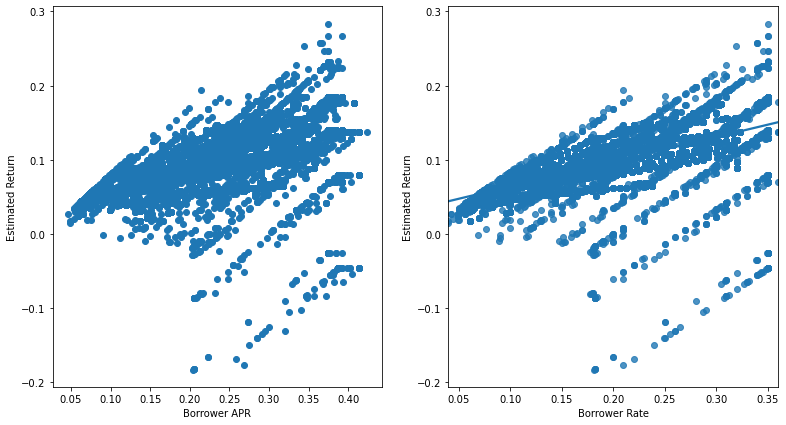

In [21]:
# figure size define 
plt.figure(figsize = [13, 7])
# Right Scatterplot 'BorrowerAPR' vs 'EstimatedReturn'
plt.subplot(1, 2, 1)
plt.scatter(data = prosper_loan, x = 'BorrowerAPR', y = 'EstimatedReturn')
plt.xlabel('Borrower APR')
plt.ylabel('Estimated Return')
#Left regplot 'BorrowerRate' vs'EstimatedReturn'
plt.subplot(1, 2, 2)
sb.regplot(data = prosper_loan, x = 'BorrowerRate', y = 'EstimatedReturn')
plt.xlabel('Borrower Rate')
plt.ylabel('Estimated Return')

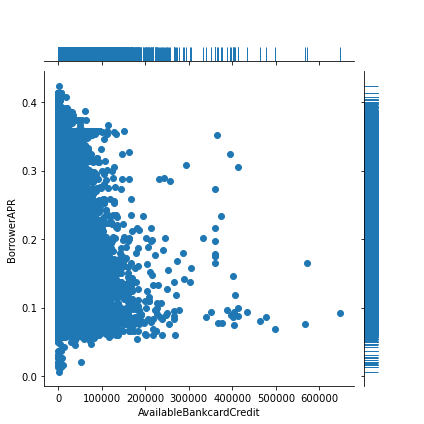

In [22]:
#'AvailableBankcardCredit' is total available credit via bank card.
g = sb.JointGrid(data = prosper_loan, x = 'AvailableBankcardCredit', y = 'BorrowerAPR')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

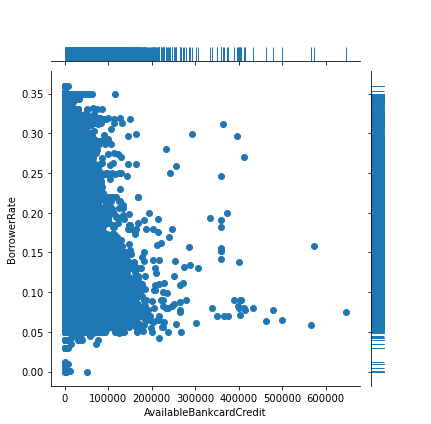

In [23]:
#'AvailableBankcardCredit' vs 'BorrowerRate' JointGrid representation
g = sb.JointGrid(data = prosper_loan, x = 'AvailableBankcardCredit', y = 'BorrowerRate')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

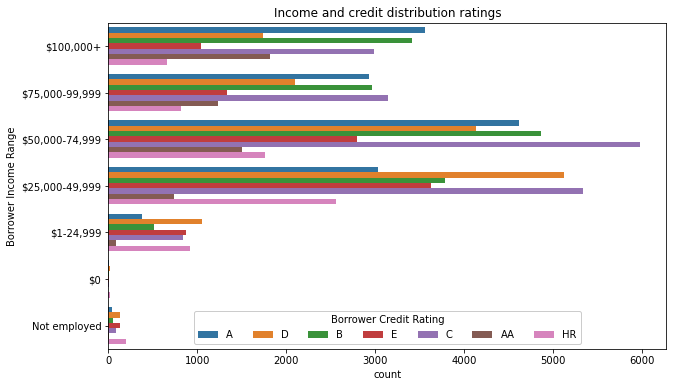

In [24]:
#Order variables
#create a list to order variables
inc_order=['$100,000+','$75,000-99,999', '$50,000-74,999' , '$25,000-49,999' , '$1-24,999', '$0', 'Not employed']
# Clustered bar chart
# first we must import the seaborn
import seaborn as sns
# Detect missing values for IncomeRange variable
prosper_loan = prosper_loan[~prosper_loan.IncomeRange.isna()]
#Defining Figure size
plt.figure(figsize = [10,6])

ax = sns.countplot(data = prosper_loan, y = 'IncomeRange', hue = 'ProsperRating (Alpha)', order = inc_order)
ax.legend(loc = 8, ncol = 8, framealpha = 1, title = 'Borrower Credit Rating')
plt.title('Income and credit distribution ratings')
plt.ylabel('Borrower Income Range');

Because we have a lot of data,we will create a heatmap of numerical values and we will add annotations to cells in the plot indicating the count of points in each cell.

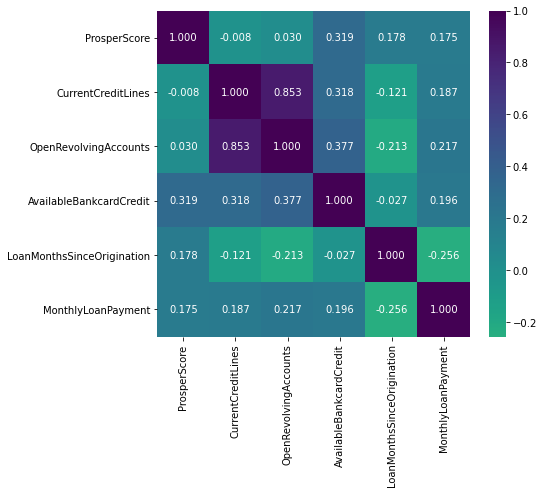

In [25]:
#we will look at the numeric_values correlations presented in the data.
plt.figure(figsize = [7, 6])
sb.heatmap(prosper_loan[numeric_values].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0)
plt.show()

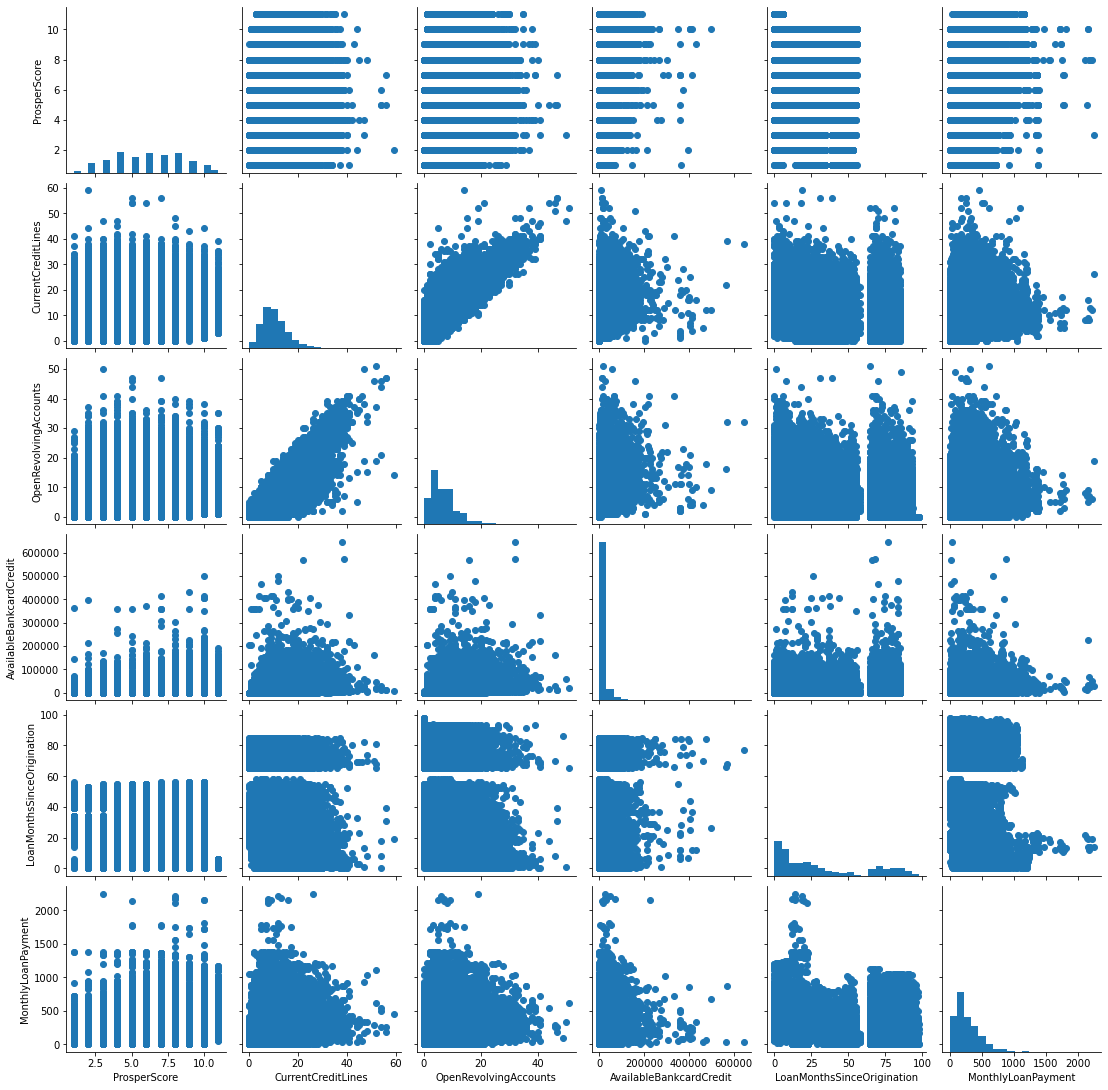

In [28]:
# Plot matrix of numeric values using PairGrid: sample 500 loans so that plots are clearer and render faster
samples = np.random.choice(prosper_loan.shape[0], 500, replace = False)
loans_samp = prosper_loan.loc[samples,:]

g = sb.PairGrid(data = prosper_loan, vars = numeric_values)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

We will then look at how "CurrentCreditLines" and "OpenRevolvingAccounts" correlate with the categorical variables "LoanStatus". We will have a violin plot at the left and a categorical plot at the right.

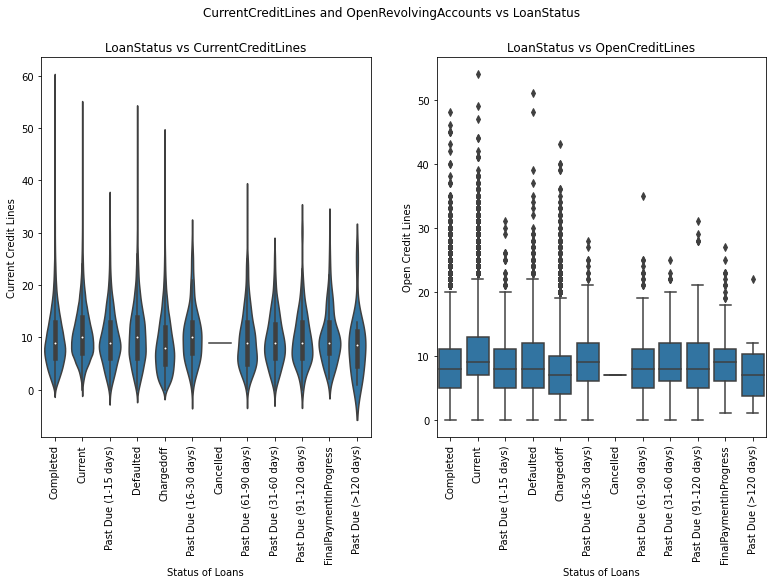

In [30]:
# Order the categorical variable in the LoanStatus column
cat_order = prosper_loan['LoanStatus'].value_counts().index

# Define figure size and color palletter 
plt.figure(figsize = [13, 7])
default_color = sb.color_palette()[0]
# LoanStatus vs CurrentCreditLines on the left
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=prosper_loan, x='LoanStatus', y='CurrentCreditLines', color = default_color)
plt.xlabel('Status of Loans')
plt.ylabel('Current Credit Lines')
plt.title('LoanStatus vs CurrentCreditLines')
plt.xticks(rotation=90);

# LoanStatus vs OpenCreditLines on the right
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=prosper_loan, x='LoanStatus', y='OpenCreditLines', color = default_color)
plt.xlabel('Status of Loans')
plt.ylabel('Open Credit Lines')
plt.title('LoanStatus vs OpenCreditLines')
plt.xticks(rotation=90);

#Create main title for all the subplots
plt.suptitle('CurrentCreditLines and OpenRevolvingAccounts vs LoanStatus')
plt.show()

Next we have an boxblot figure Loaner Rates based on years

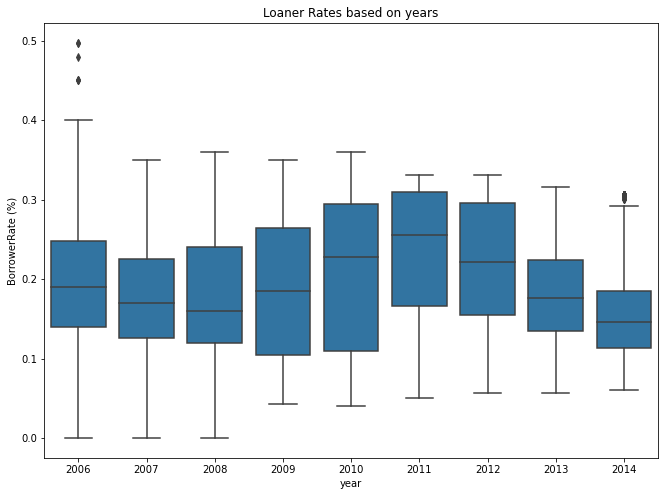

In [31]:
plt.figure(figsize=[11, 8]);
sb.boxplot(data = prosper_loan, x = 'year', y = 'BorrowerRate', color = default_color);
plt.ylabel('BorrowerRate (%)')
plt.title('Loaner Rates based on years');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- In this section, I first studied variables that may have impacts on the  borrower Estimated Return and AvailableBankcardCredit  on the client on the Borrower Rate and APR. 
- I than did a clustered bar chart to find out the Income and credit distribution ratings based incomes and ratings.
- I've used a numeric values list to represent a HeatMap and a Pairgrid figures of the correlations presented in the data.
- Another feature can be used the predict status of loans based on  'CurrentCreditLines' and 'OpenRevolvingAccounts' variables.
- We can see that most loans where done in 2010.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- I studied the relationships between IncomeRange and ProsperRating  and found the that clients with the best ratings are those that have higher salaries.

- When a borrower has relatively low credit amount, under 20,000, the probabilities of getting low and high interest rates are similar.Nevertheless, when the borrower’s credit amount is high , above 50,000, is more likely to get a lower interest rate.
- I do observe that the relationships between CurrentCreditLines and OpenCreditLines are quite based on the loan status  are quite similar.

## Multivariate Exploration

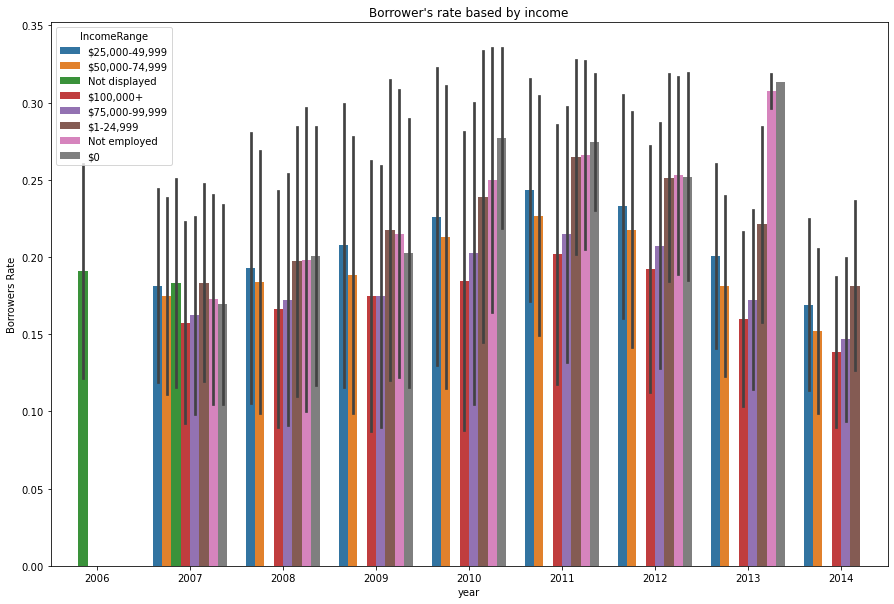

In [39]:
#Barplot of the loaner's rate based by income range
plt.figure(figsize=[15, 10]);
color = sb.color_palette()[2]
sb.barplot(data = prosper_loan, x = 'year', y = 'BorrowerRate', hue = 'IncomeRange', ci = 'sd');
plt.ylabel('Borrowers Rate');
plt.title('Borrower\'s rate based by income');

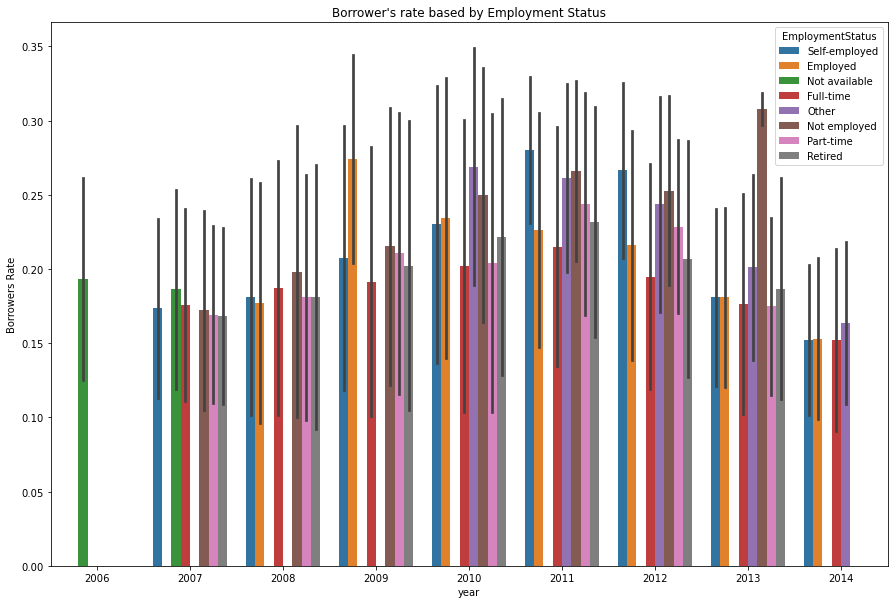

In [40]:
#Boxplot of the loaner's rate based by the Employment Status 
plt.figure(figsize=[15, 10]);
color = sb.color_palette()[2]
sb.barplot(data = prosper_loan, x = 'year', y = 'BorrowerRate', hue = 'EmploymentStatus', ci = 'sd');
plt.ylabel('Borrowers Rate');
plt.title('Borrower\'s rate based by Employment Status');

In [34]:
# select loans payments bigger than 200& and smaller than 600&
loans_flag = (prosper_loan['MonthlyLoanPayment'] >= 200) & (prosper_loan['MonthlyLoanPayment'] <= 600)
loans_1c = prosper_loan.loc[loans_flag,:]

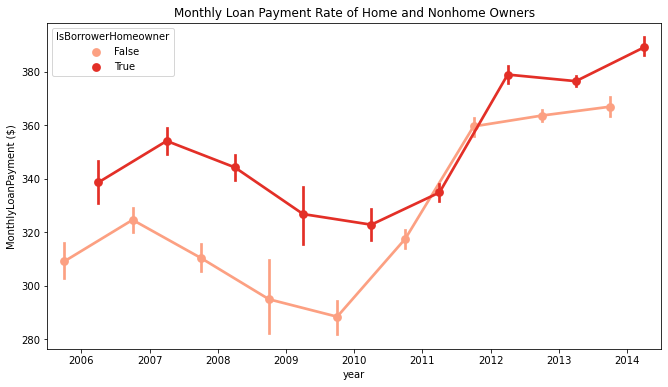

In [35]:
# Plot the figure based on Monthly Loan Payments of Homeowners and Non-Homeowners between 2006 and 2014
fig = plt.figure(figsize = [11,6])
ax = sb.pointplot(data = loans_1c, x = 'year', y = 'MonthlyLoanPayment', hue = 'IsBorrowerHomeowner',
           palette = 'Reds', dodge = 0.5)
plt.title('Monthly Loan Payment Rate of Home and Nonhome Owners')
plt.ylabel('MonthlyLoanPayment ($)')
ax.set_yticklabels([],minor = True)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- We observe in the first Barplot figure that acrross the recorded years year 2007 and 2014 the borrowers rate, especially of those with small income, increase gradually till 2013 and decrease suddenly in the next year 2013.
-  In the second multivariate Barplot representation we observe that borrowers rate based on income have a peak on all categories in 2010 and 2011.
- In the third representation that Homeowners pay increasingly gradually more monthly loan payments  than those that don't own a home. 

### Were there any interesting or surprising interactions between features?
Prosper Loan Company does a good job in collecting their loan data of clients. However, It takes some steps in cleaning and simplifying the dataset before it ready to be used.
I think the company can have a good and detailed understanding of their clients as well as they can create a plan to better their products/services.
Monthly homeowners pay of the who own a home and those who don't own a home overlap between 2011 and 2012, meaning they are paying an equal amount of money.
There is a fall between Q2 of 2008 and end of 2010, which can be related to the global financial crisis.
I also found that the company may implemented some changes to its business model between 2009 and 2010 . Therefore, an analysis of loans created before that date only has limited meaning if you want to draw conclusions about company as it operates today
